# Crash Course in Causality: Data Preparation for Causal Analysis in Machine Learning

---

## Abstract

Causality in machine learning focuses on the discovery and understanding of cause-and-effect relationships between variables in a dataset. In contrast to correlation, which merely brings out the statistical association between variables, causality tries to establish if the variation in one variable results in a change in another. For example, although correlation may indicate that higher advertising expenditure is related to higher sales, causality would be interested in establishing whether it is the increased expenditure that caused the sales to rise.

This notebook serves as a comprehensive guide for preparing datasets for causal inference and machine learning applications. It explores the critical aspects of data preprocessing to ensure robust and unbiased causal analysis.

The notebook provides a structured approach to handling common challenges in causal datasets, including missing data, outliers, feature encoding, and scaling. It emphasizes the importance of adjusting for confounders and preserving causal structures to accurately estimate causal effects. Through practical Python implementations, readers will gain hands-on experience with techniques such as:

- Imputing missing values using statistical and machine learning-based methods.
- Identifying and treating outliers to prevent skewed results.
- Encoding categorical variables to preserve causal relationships.
- Feature scaling and engineering to enhance model performance and stability.
- Visualizing relationships and distributions to support exploratory data analysis (EDA).

By combining theoretical explanations with functional code examples, this notebook equips readers with the skills to prepare data for causal models that are both interpretable and reliable. Readers will learn how data preparation directly impacts the validity of causal inferences, helping them build robust machine learning models that provide actionable insights into cause-and-effect relationships.

Whether you are a data scientist, machine learning practitioner, or student, this notebook offers a practical crash course in causality, bridging the gap between theory and implementation.

---

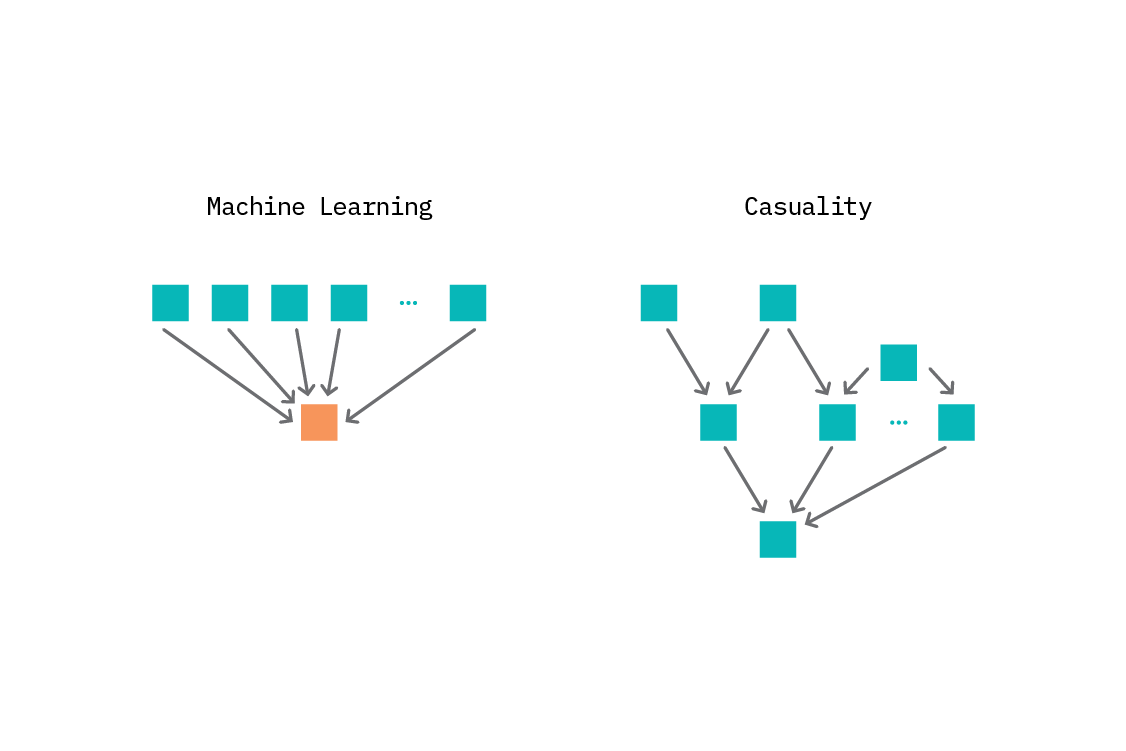

## Theory

### Introduction to Causality in Machine Learning

Causality focuses on understanding the **cause-and-effect relationships** between variables, moving beyond mere associations or correlations. In machine learning, integrating causal analysis allows us to:

- **Make informed decisions:** By understanding what causes what, we can predict the effects of interventions.
- **Enhance model interpretability:** Causal models provide explanations for predictions, not just predictions themselves.
- **Improve generalization:** Causal relationships tend to hold across different settings, making models more robust to changes.

#### Differences Between Correlation and Causation

- **Correlation:** Measures the statistical association between two variables. Correlated variables move together but do not imply one causes the other.
- **Causation:** Implies that changes in one variable bring about changes in another.

Understanding causality is crucial, especially in domains like healthcare, economics, and social sciences, where interventions based on incorrect causal assumptions can have significant consequences.

---

### Key Principles of Causality

#### 1. Causal Effect

The **causal effect** quantifies the change in an outcome variable resulting from manipulating a treatment or exposure variable, while holding other factors constant.

- **Average Treatment Effect (ATE):** The expected difference in outcomes between units assigned to the treatment and control groups.

Mathematically, for treatment \( T \) and outcome \( Y \):

\[
ATE = E[Y | T=1] - E[Y | T=0]
\]

#### 2. Confounding Variables

**Confounders** are variables that influence both the treatment and the outcome. They create a spurious association if not properly controlled.

- **Example:** In studying the effect of smoking on health, age may be a confounder since it affects both smoking habits and health outcomes.

Failing to adjust for confounders can lead to **biased estimates** of the causal effect.

#### 3. Directed Acyclic Graphs (DAGs)

**DAGs** are graphical representations used to model causal relationships between variables.

- **Nodes:** Represent variables.
- **Edges (arrows):** Indicate causal influence from one variable to another.
- **Acyclic:** The graph has no loops; you cannot return to the same node by following the directed edges.

DAGs help in:

- **Identifying confounding paths.**
- **Determining appropriate adjustment sets.**
- **Avoiding collider bias and selection bias.**

---

### Data Preprocessing Techniques for Causal Analysis

Proper data preparation ensures that causal inferences are valid and reliable. Key preprocessing steps include:

#### 1. Handling Missing Data

Missing data can introduce bias and reduce statistical power. Reasons for missing data:

- **Missing Completely at Random (MCAR):** Missingness is unrelated to any observed or unobserved data.
- **Missing at Random (MAR):** Missingness is related to observed data.
- **Missing Not at Random (MNAR):** Missingness is related to unobserved data.

**Techniques:**

- **Listwise Deletion:** Removes any observations with missing values.
  - *Pros:* Simple to implement.
  - *Cons:* Can lead to loss of data and biased results if data are not MCAR.

- **Imputation Methods:**
  - **Mean/Mode Imputation:** Replaces missing values with the mean (numerical) or mode (categorical).
    - *Pros:* Simple and quick.
    - *Cons:* Underestimates variability; can introduce bias.
  - **K-Nearest Neighbors (KNN) Imputation:** Uses the mean of k-nearest neighbors to impute missing values.
    - *Pros:* Preserves data structure.
    - *Cons:* Computationally intensive.
  - **Multiple Imputation:** Generates several imputed datasets and combines results.
    - *Pros:* Accounts for uncertainty in missing values.
    - *Cons:* Complex to implement.

#### 2. Feature Selection

Selecting the right variables is crucial to adjust for confounding.

- **Domain Knowledge:** Leverage expertise to identify potential confounders.
- **Statistical Methods:**
  - **Backdoor Criterion:** A set of variables that, when conditioned on, blocks all backdoor paths from the treatment to the outcome.
  - **Pearson/Spearman Correlation:** Measures linear/non-linear associations.

**Avoiding Collider Bias:**

- Do not condition on a variable that is a result of two or more variables in the causal pathway (a collider), as it can induce spurious associations.

#### 3. Encoding Categorical Variables

Proper encoding ensures that the causal relationships are preserved and that machine learning algorithms can process the data.

- **One-Hot Encoding:** Converts categorical variables into binary dummy variables.
  - *Pros:* Does not assume any order.
  - *Cons:* Increases dimensionality.

- **Ordinal Encoding:** Assigns numerical values to categories with an inherent order.
  - *Pros:* Preserves the order.
  - *Cons:* Assumes equal intervals between categories.

- **Impact on Causality:** Incorrect encoding can distort the relationships between variables. For instance, treating a nominal variable as ordinal can introduce misleading patterns.

#### 4. Identifying Outliers

Outliers can skew results and affect causal estimates.

- **Detection Methods:**
  - **Z-Score Method:** Identifies data points that are several standard deviations away from the mean.
  - **Interquartile Range (IQR) Method:** Flags values outside 1.5 times the IQR.

- **Treatment Options:**
  - **Removal:** If outliers are due to data entry errors or anomalies.
  - **Transformation:** Applying log or square root transformations.
  - **Robust Methods:** Using algorithms less sensitive to outliers.

#### 5. Feature Scaling

Feature scaling ensures that variables contribute equally to the analysis, especially for distance-based algorithms.

- **Standardization (Z-score normalization):** Rescales data to have a mean of zero and a standard deviation of one.
- **Normalization (Min-Max scaling):** Scales data to a fixed range, usually [0, 1].

**Impact on Causality:**

- Scaling does not affect the causal relationships but can improve numerical stability in computations.

---

### Supporting Causal Interpretation

Data preparation supports causal interpretation by:

- **Adjusting for Confounders:** Ensures that the estimated effects are not biased.
- **Maintaining Data Quality:** Reduces errors and inconsistencies that can obscure causal relationships.
- **Preserving Causal Structures:** Appropriate encoding and handling keep the relationships between variables intact.

---

## Practical Code Examples

In this section, we demonstrate the data preparation techniques using Python. Each code block includes explanations to clarify the practical applications of the theoretical concepts.


In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Configuring visualizations
%matplotlib inline
sns.set(style='whitegrid')

## Loading and Exploring the Data
- **Purpose:** Simulate a dataset that represents a realistic causal analysis scenario.
- **Variables:**
  - `Age`: Predictor of both the treatment (smoking) and the outcome (health score).
  - `Education`: Categorical variable representing levels of education.
  - `Income`: Continuous variable dependent on `Age` and subject to missingness.
  - `Smoking`: Binary treatment variable (1 = smoker, 0 = non-smoker).
  - `HealthScore`: Outcome variable dependent on `Age`, `Smoking`, and random noise.
- **Missing Data:** Introduced randomly in `Income` and `Education` to reflect real-world challenges.


In [2]:
np.random.seed(42)

# Generating synthetic data
n_samples = 1000
age = np.random.randint(18, 70, size=n_samples)
education_levels = ['High School', 'Bachelor', 'Master', 'PhD']
education = np.random.choice(education_levels, size=n_samples, p=[0.4, 0.3, 0.2, 0.1])
income = age * 1000 + np.random.normal(0, 10000, size=n_samples)
smoking = np.random.binomial(1, p=0.3, size=n_samples)  # 1 if smoker, 0 otherwise
health_score = 100 - age * 0.5 - smoking * 10 + np.random.normal(0, 5, size=n_samples)

data = pd.DataFrame({
    'Age': age,
    'Education': education,
    'Income': income,
    'Smoking': smoking,
    'HealthScore': health_score
})

# Introducing missing values randomly
for col in ['Income', 'Education']:
    data.loc[data.sample(frac=0.1, random_state=42).index, col] = np.nan

data.head()


,Age,Education,Income,Smoking,HealthScore
0,56,Bachelor,45076.872353,0,71.070771
1,69,High School,65835.915503,0,67.049995
2,46,High School,58130.977000,0,76.717058
3,32,High School,33417.169136,0,90.094854
4,60,High School,83193.295400,1,50.244491


## Visualizing the Data
- **Purpose:** Use visualizations to explore the dataset and identify potential issues:
  - Distribution of continuous variables (e.g., `Age`, `Income`, `HealthScore`).
  - Frequency of categorical variables (`Education`).
- **Key Insights:** These plots help detect:
  - Skewness or irregular distributions.
  - Missing data patterns.
  - Potential outliers.


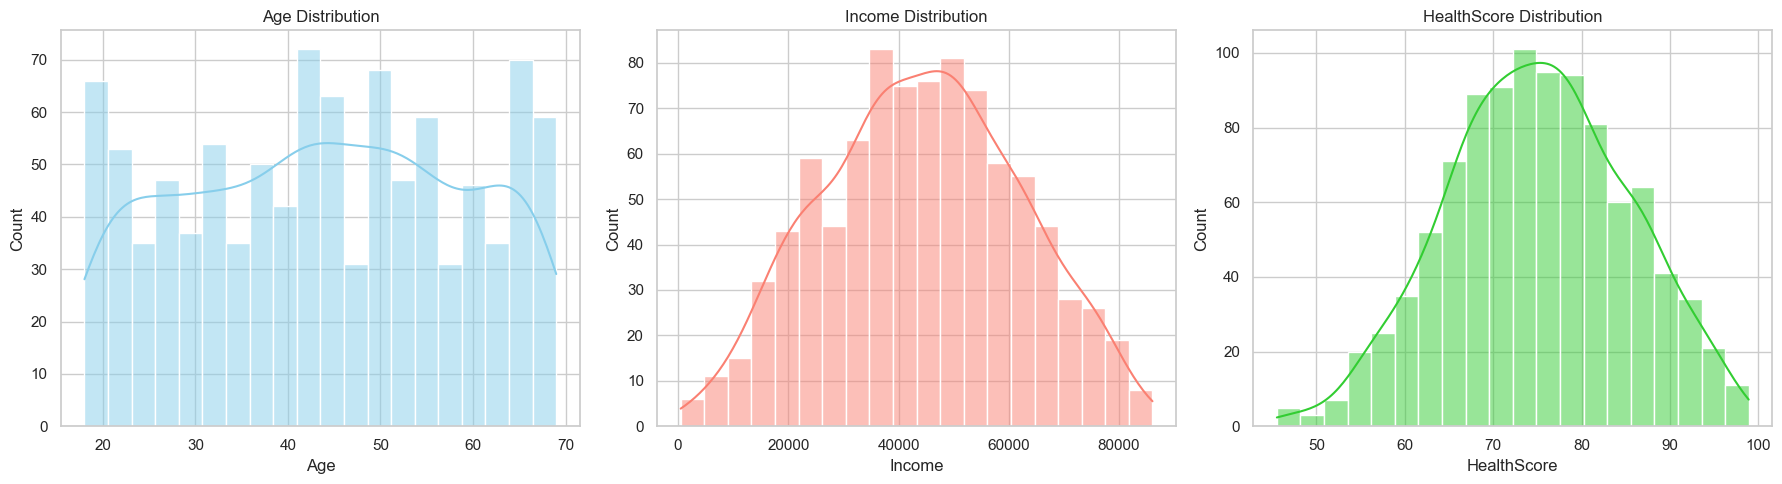

In [3]:
# Visualizing distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Age distribution
sns.histplot(data['Age'].dropna(), bins=20, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Age Distribution')

# Income distribution
sns.histplot(data['Income'].dropna(), bins=20, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Income Distribution')

# HealthScore distribution
sns.histplot(data['HealthScore'], bins=20, kde=True, ax=axes[2], color='limegreen')
axes[2].set_title('HealthScore Distribution')

plt.tight_layout()
plt.show()


/var/folders/56/0rq8hqtj35g4n65wgy88kr000000gn/T/ipykernel_15908/3023118214.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='pastel', order=education_levels)


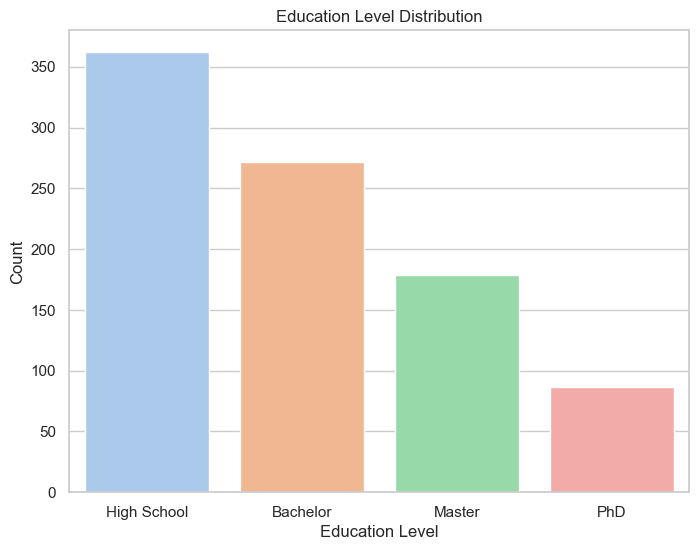

In [4]:
# Count plot for Education levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data, palette='pastel', order=education_levels)
plt.title('Education Level Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


## Handling Missing Data
1. **Identifying Missing Data:**
   - Calculate the percentage of missing values to understand the extent of the problem.
   - Missing data is a common challenge in causal analysis and must be handled appropriately to avoid bias.

2. **KNN Imputation:**
   - For `Income` (a continuous variable), we use KNN imputation.
   - The imputation process considers the nearest neighbors' `Age` to estimate missing values.

3. **Mode Imputation:**
   - For `Education` (a categorical variable), we use the most frequent category to replace missing values.
   - This is a simple yet effective strategy when the missingness is random.


In [5]:
# Calculating missing data percentages
missing_percentages = data.isnull().mean() * 100
print("Missing Data Percentages:\n", missing_percentages)


Missing Data Percentages:
 Age             0.0
Education      10.0
Income         10.0
Smoking         0.0
HealthScore     0.0
dtype: float64


## Imputing Data

In [6]:
# KNN Imputer for 'Income'
from sklearn.impute import KNNImputer

# Selecting numerical columns for KNN Imputer
knn_imputer = KNNImputer(n_neighbors=5)
data['Income'] = knn_imputer.fit_transform(data[['Age', 'Income']])[:, 1]


In [7]:
# Imputing 'Education' with the mode
education_imputer = SimpleImputer(strategy='most_frequent')
data['Education'] = education_imputer.fit_transform(data[['Education']]).ravel()


In [8]:
# Checking for any remaining missing values
print("Missing Data After Imputation:\n", data.isnull().sum())


Missing Data After Imputation:
 Age            0
Education      0
Income         0
Smoking        0
HealthScore    0
dtype: int64


## Identifying and Handling Outliers
1. **Detection:**
   - A boxplot visualizes the spread and identifies data points that fall outside the IQR range.
   - Outliers can skew statistical results and impact causal inferences.

2. **IQR Method:**
   - Calculate the interquartile range (IQR).
   - Define thresholds for identifying outliers as points outside \( [Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR] \).

3. **Treatment:**
   - Outliers are removed if they are deemed to result from data errors or anomalies.
   - Alternatively, robust models can be used to handle outliers without removing them.


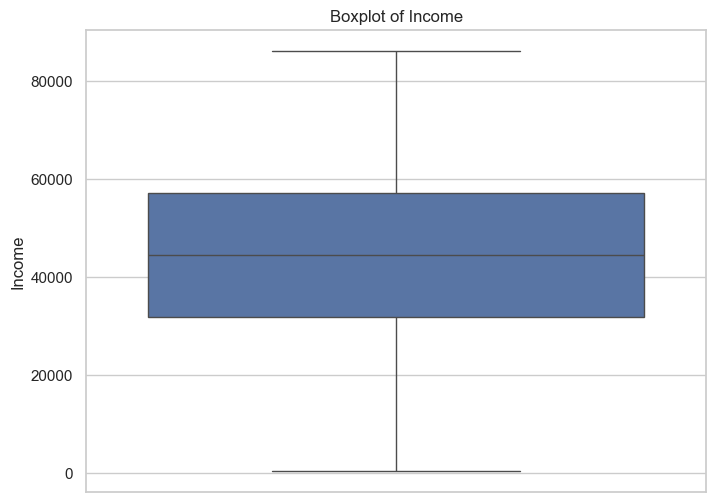

In [9]:
# Plotting boxplot to detect outliers
plt.figure(figsize=(8, 6))
sns.boxplot(y='Income', data=data)
plt.title('Boxplot of Income')
plt.ylabel('Income')
plt.show()


In [10]:
# Calculating IQR
Q1 = data['Income'].quantile(0.25)
Q3 = data['Income'].quantile(0.75)
IQR = Q3 - Q1

# Defining outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering out outliers
data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]


## Encoding Categorical Variables
- **Purpose:** Convert the categorical variable `Education` into a numeric format suitable for machine learning models.
- **One-Hot Encoding:**
  - Transforms each category into a binary variable.
  - Ensures no ordinal relationship is assumed (as `Education` is nominal).
  - The `drop='first'` parameter avoids multicollinearity by dropping one dummy variable.
- **Result:** `Education` is represented by multiple binary columns, preserving the causal structure and interpretability.


In [11]:
# One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False, drop='first')
education_encoded = encoder.fit_transform(data[['Education']])

# Creating a DataFrame with encoded variables
education_encoded_df = pd.DataFrame(education_encoded, columns=encoder.get_feature_names_out(['Education']))
education_encoded_df.index = data.index

# Combining with the original data
data_encoded = pd.concat([data.drop('Education', axis=1), education_encoded_df], axis=1)


## Feature Scaling
- **Purpose:** Scale numerical variables to ensure equal contribution to the analysis, especially for distance-based methods or when dealing with features of varying magnitudes.
- **Standardization:**
  - Centers the data around zero with a standard deviation of one.
  - Preserves relationships between variables and is commonly used for linear models.
- **Impact:** While scaling does not affect causal relationships, it improves numerical stability and algorithm performance.


In [12]:
# Standardizing 'Age' and 'Income'
scaler = StandardScaler()
data_encoded[['Age', 'Income']] = scaler.fit_transform(data_encoded[['Age', 'Income']])


## Building a Causal Model
1. **Feature Matrix (X):**
   - Includes all variables except the target (`HealthScore`).
   - Contains confounders (`Age`, `Education`, `Income`) and the treatment variable (`Smoking`).

2. **Target Variable (y):**
   - Represents the outcome variable `HealthScore`.

3. **Train-Test Split:**
   - Divides the data into training and testing sets to evaluate model generalization.
   - Ensures the model's causal estimates are not overfitted to the training data.

4. **Linear Regression:**
   - Estimates the linear relationship between predictors and the outcome.
   - Coefficients indicate the direction and magnitude of the effect of each variable on `HealthScore`.


In [13]:
# Defining features and target variable
X = data_encoded.drop('HealthScore', axis=1)
y = data_encoded['HealthScore']


In [14]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Interpreting the Coefficients
- **Purpose:** Examine the regression coefficients to understand the causal relationships.
- **Key Coefficient:**
  - The coefficient for `Smoking` represents its estimated causal effect on `HealthScore`.
  - Negative values indicate a detrimental impact of smoking on health.
- **Feature Importance:**
  - Variables with larger absolute coefficients have a stronger influence on the outcome.
- **Note:** The interpretation assumes that the model is correctly specified and confounders are adequately controlled.


In [16]:
# Extracting the coefficients
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_
})

# Sorting by the absolute value of coefficients
coefficients['AbsCoefficient'] = coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='AbsCoefficient', ascending=False).drop('AbsCoefficient', axis=1)
coefficients.reset_index(drop=True, inplace=True)

# Displaying the coefficients
coefficients


,Feature,Coefficient
0,Smoking,-10.523391
1,Age,-7.834199
2,Education_PhD,-1.322767
3,Education_High School,-0.426046
4,Income,0.213782
5,Education_Master,-0.000794


## Evaluating the Model
1. **Performance Metrics:**
   - **Mean Squared Error (MSE):** Measures the average squared difference between predicted and actual values. Lower values indicate better model fit.
   - **R-squared:** Represents the proportion of variance in `HealthScore` explained by the predictors. Higher values indicate better explanatory power.

2. **Purpose:** Assess how well the model generalizes to unseen data and whether the causal relationships are robust.


In [17]:
# Making predictions
y_pred = model.predict(X_test)


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculating Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 29.51
R-squared: 0.73


## Visualizing the Results
1. **Regression Coefficients Plot:**
   - Visualizes the magnitude and direction of each predictor's influence on `HealthScore`.
   - Helps identify the most influential variables.

2. **Correlation Matrix:**
   - Displays pairwise correlations between variables.
   - Highlights multicollinearity and relationships relevant to causal analysis.

3. **Pairplot:**
   - Explores distributions and bivariate relationships between key variables (`Age`, `Income`, `HealthScore`).
   - Differentiates by the treatment variable (`Smoking`).

4. **Insights from Visualizations:**
   - Validate model assumptions.
   - Detect potential data issues (e.g., multicollinearity).
   - Confirm causal pathways suggested by the theory.


/var/folders/56/0rq8hqtj35g4n65wgy88kr000000gn/T/ipykernel_15908/2862349962.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


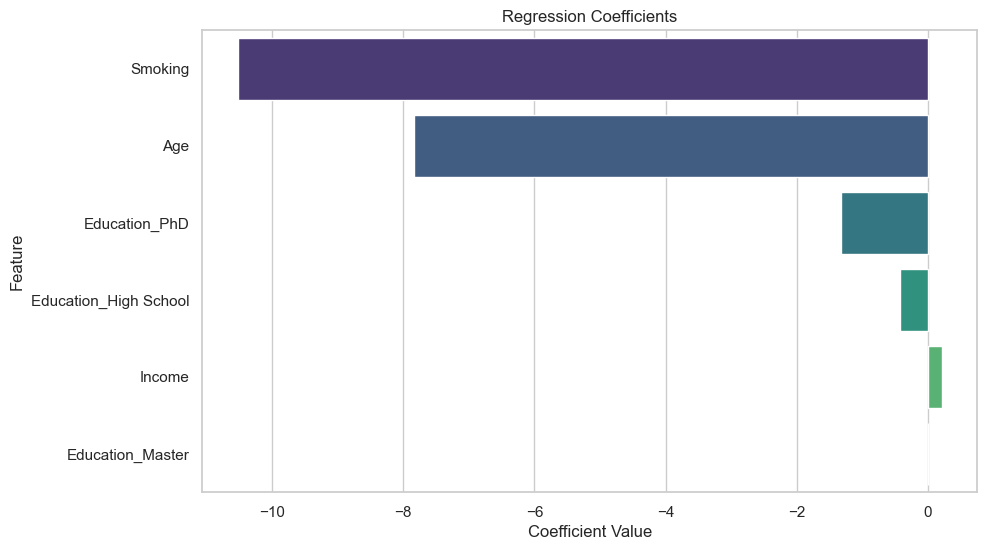

In [19]:
# Plotting the coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Regression Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()


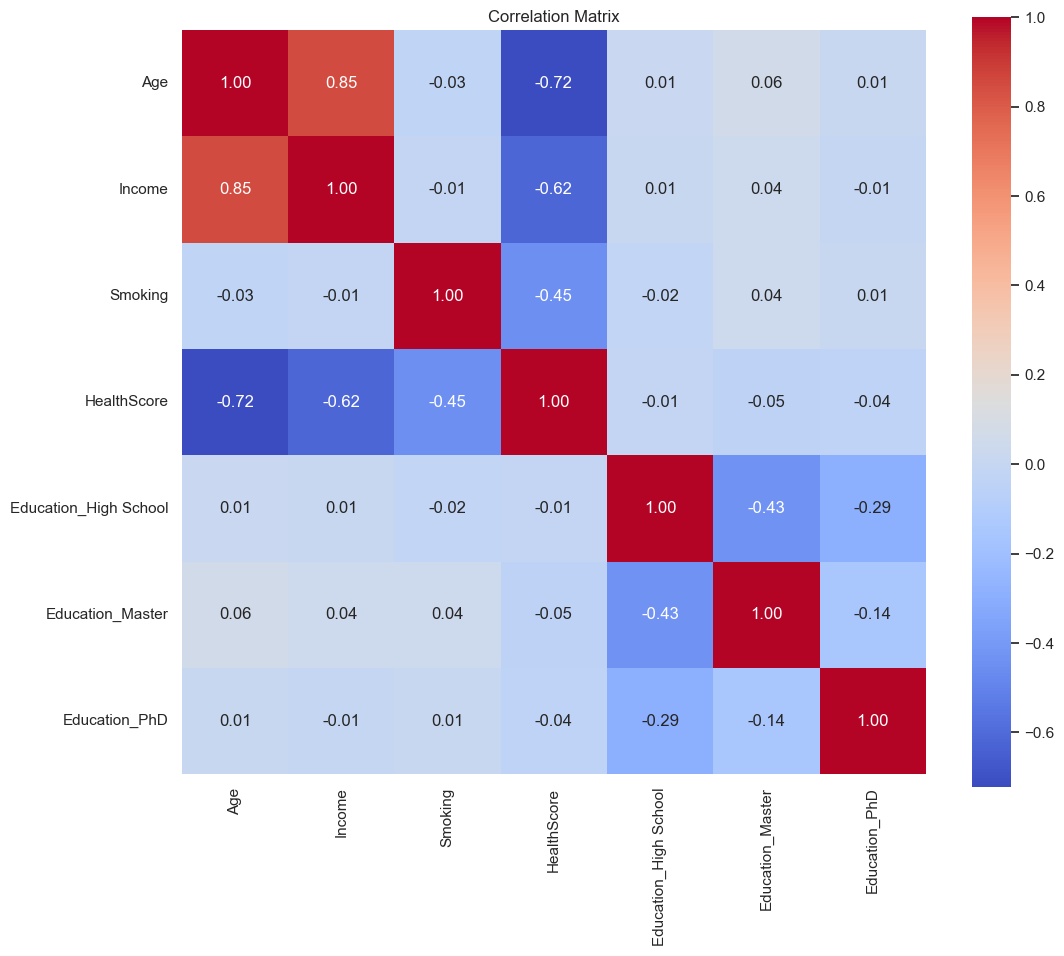

In [20]:
# Calculating the correlation matrix
corr_matrix = data_encoded.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


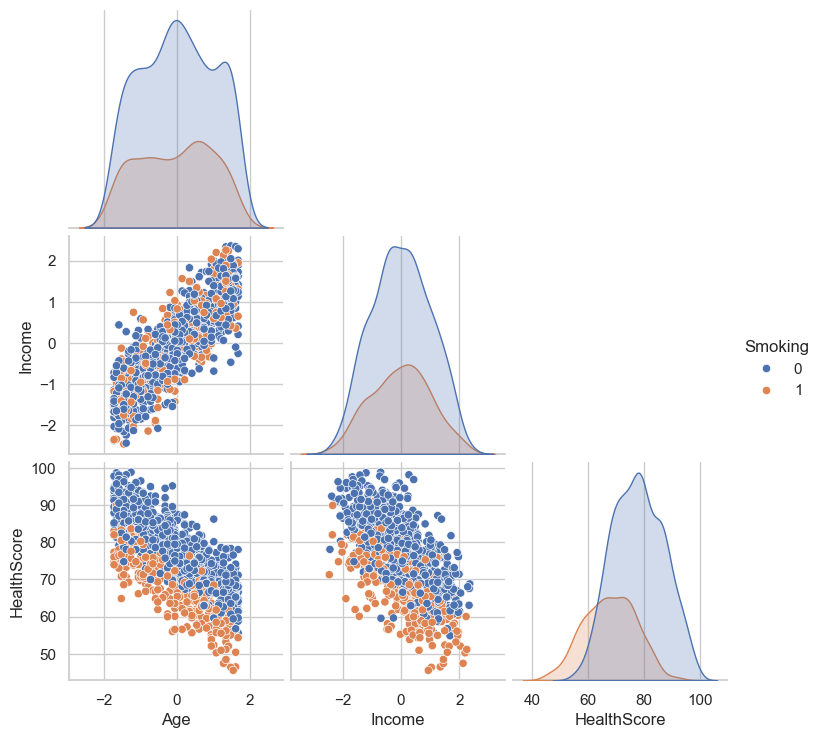

In [21]:
# Creating a pairplot
sns.pairplot(data_encoded, vars=['Age', 'Income', 'HealthScore'], hue='Smoking', corner=True)
plt.show()


## Conclusion
Data preparation is a crucial step in causal analysis for machine learning. Proper handling of missing data, outliers, encoding of categorical variables, feature scaling, and careful feature selection are essential to ensure valid causal inferences.

Key Takeaways:

1. Handling Missing Data: Methods like KNN imputation can preserve data integrity.
2. Outlier Treatment: Removing outliers prevents skewed results.
3. Encoding Categorical Variables: Proper encoding preserves causal relationships.
4. Feature Scaling: Standardization ensures numerical stability.
5. Adjusting for Confounders: Including confounders in the model reduces bias in estimating causal effects.
   
By meticulously preparing data, we enhance both the predictive accuracy and the interpretability of causal models, leading to more reliable and actionable insights.


## References
1. Pearl, J. (2009). Causality: Models, Reasoning, and Inference. Cambridge University Press. https://doi.org/10.1017/CBO9780511803161
2. Hernán, M. A., & Robins, J. M. (2020). Causal Inference: What If. Chapman & Hall/CRC. https://www.hsph.harvard.edu/miguel-hernan/wp-content/uploads/sites/1268/2024/04/hernanrobins_WhatIf_26apr24.pdf 
3. VanderWeele, T. J. (2015). Explanation in Causal Inference: Methods for Mediation and Interaction. Oxford University Press. https://global.oup.com/academic/product/explanation-in-causal-inference-9780199325870?cc=us&lang=en&
4. Gelman, A., & Hill, J. (2006). Data Analysis Using Regression and Multilevel/Hierarchical Models. Cambridge University Press. https://www.cambridge.org/highereducation/books/data-analysis-using-regression-and-multilevel-hierarchical-models/32A29531C7FD730C3A68951A17C9D983#overview
5. Pedregosa, F., et al. (2011). Scikit-learn: Machine Learning in Python. Journal of Machine Learning Research, 12, 2825-2830. https://www.jmlr.org/papers/volume12/pedregosa11a/pedregosa11a.pdf


## License

Copyright (c) 2024 Ujwal Chandrashekar

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE, AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES, OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT, OR OTHERWISE, ARISING FROM, OUT OF, OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.